In [209]:
# Import libraries
import pandas as pd
import sklearn.decomposition as decom
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import Counter

In [347]:
# Read in raw data
df = pd.read_csv("../text-mining-project-data/clean/count-4856.csv")

In [348]:
# Save labels for later (if we need them)
labels = df["labels"]
df_data = df.drop("labels", axis=1)

In [53]:
# Run LDA on dataset. Use 5 topics
lda_model = decom.LatentDirichletAllocation(n_components=5, max_iter=10000)
lda_df = lda_model.fit_transform(df_data)

In [131]:
lda_df = lda_model.transform(df_data)

In [54]:
def print_topics(model, feature_names, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(feature_names, topic[i]) for i in topic.argsort()[:-top_n - 1:-1]])

In [55]:
print_topics(lda_model, df_data)

Topic 0:
[(      american    attack  authority  black    called      case     child  \
0          0.0  0.198012   0.210612    0.0  0.196918  0.000000  0.000000   
1          0.0  0.000000   0.232382    0.0  0.217273  0.000000  0.000000   
2          0.0  0.000000   0.000000    0.0  0.000000  0.225908  0.220709   
3          0.0  0.333065   0.177129    0.0  0.000000  0.000000  0.000000   
4          0.0  0.000000   0.000000    0.0  0.203942  0.000000  0.219440   
...        ...       ...        ...    ...       ...       ...       ...   
2620       0.0  0.000000   0.000000    0.0  0.000000  0.000000  0.168156   
2621       0.0  0.000000   0.116047    0.0  0.000000  0.000000  0.000000   
2622       0.0  0.000000   0.000000    0.0  0.131775  0.000000  0.000000   
2623       0.0  0.000000   0.000000    0.0  0.000000  0.000000  0.000000   
2624       0.0  0.000000   0.080842    0.0  0.075585  0.000000  0.000000   

          city      come  community  ...  violence      want       way  \
0 

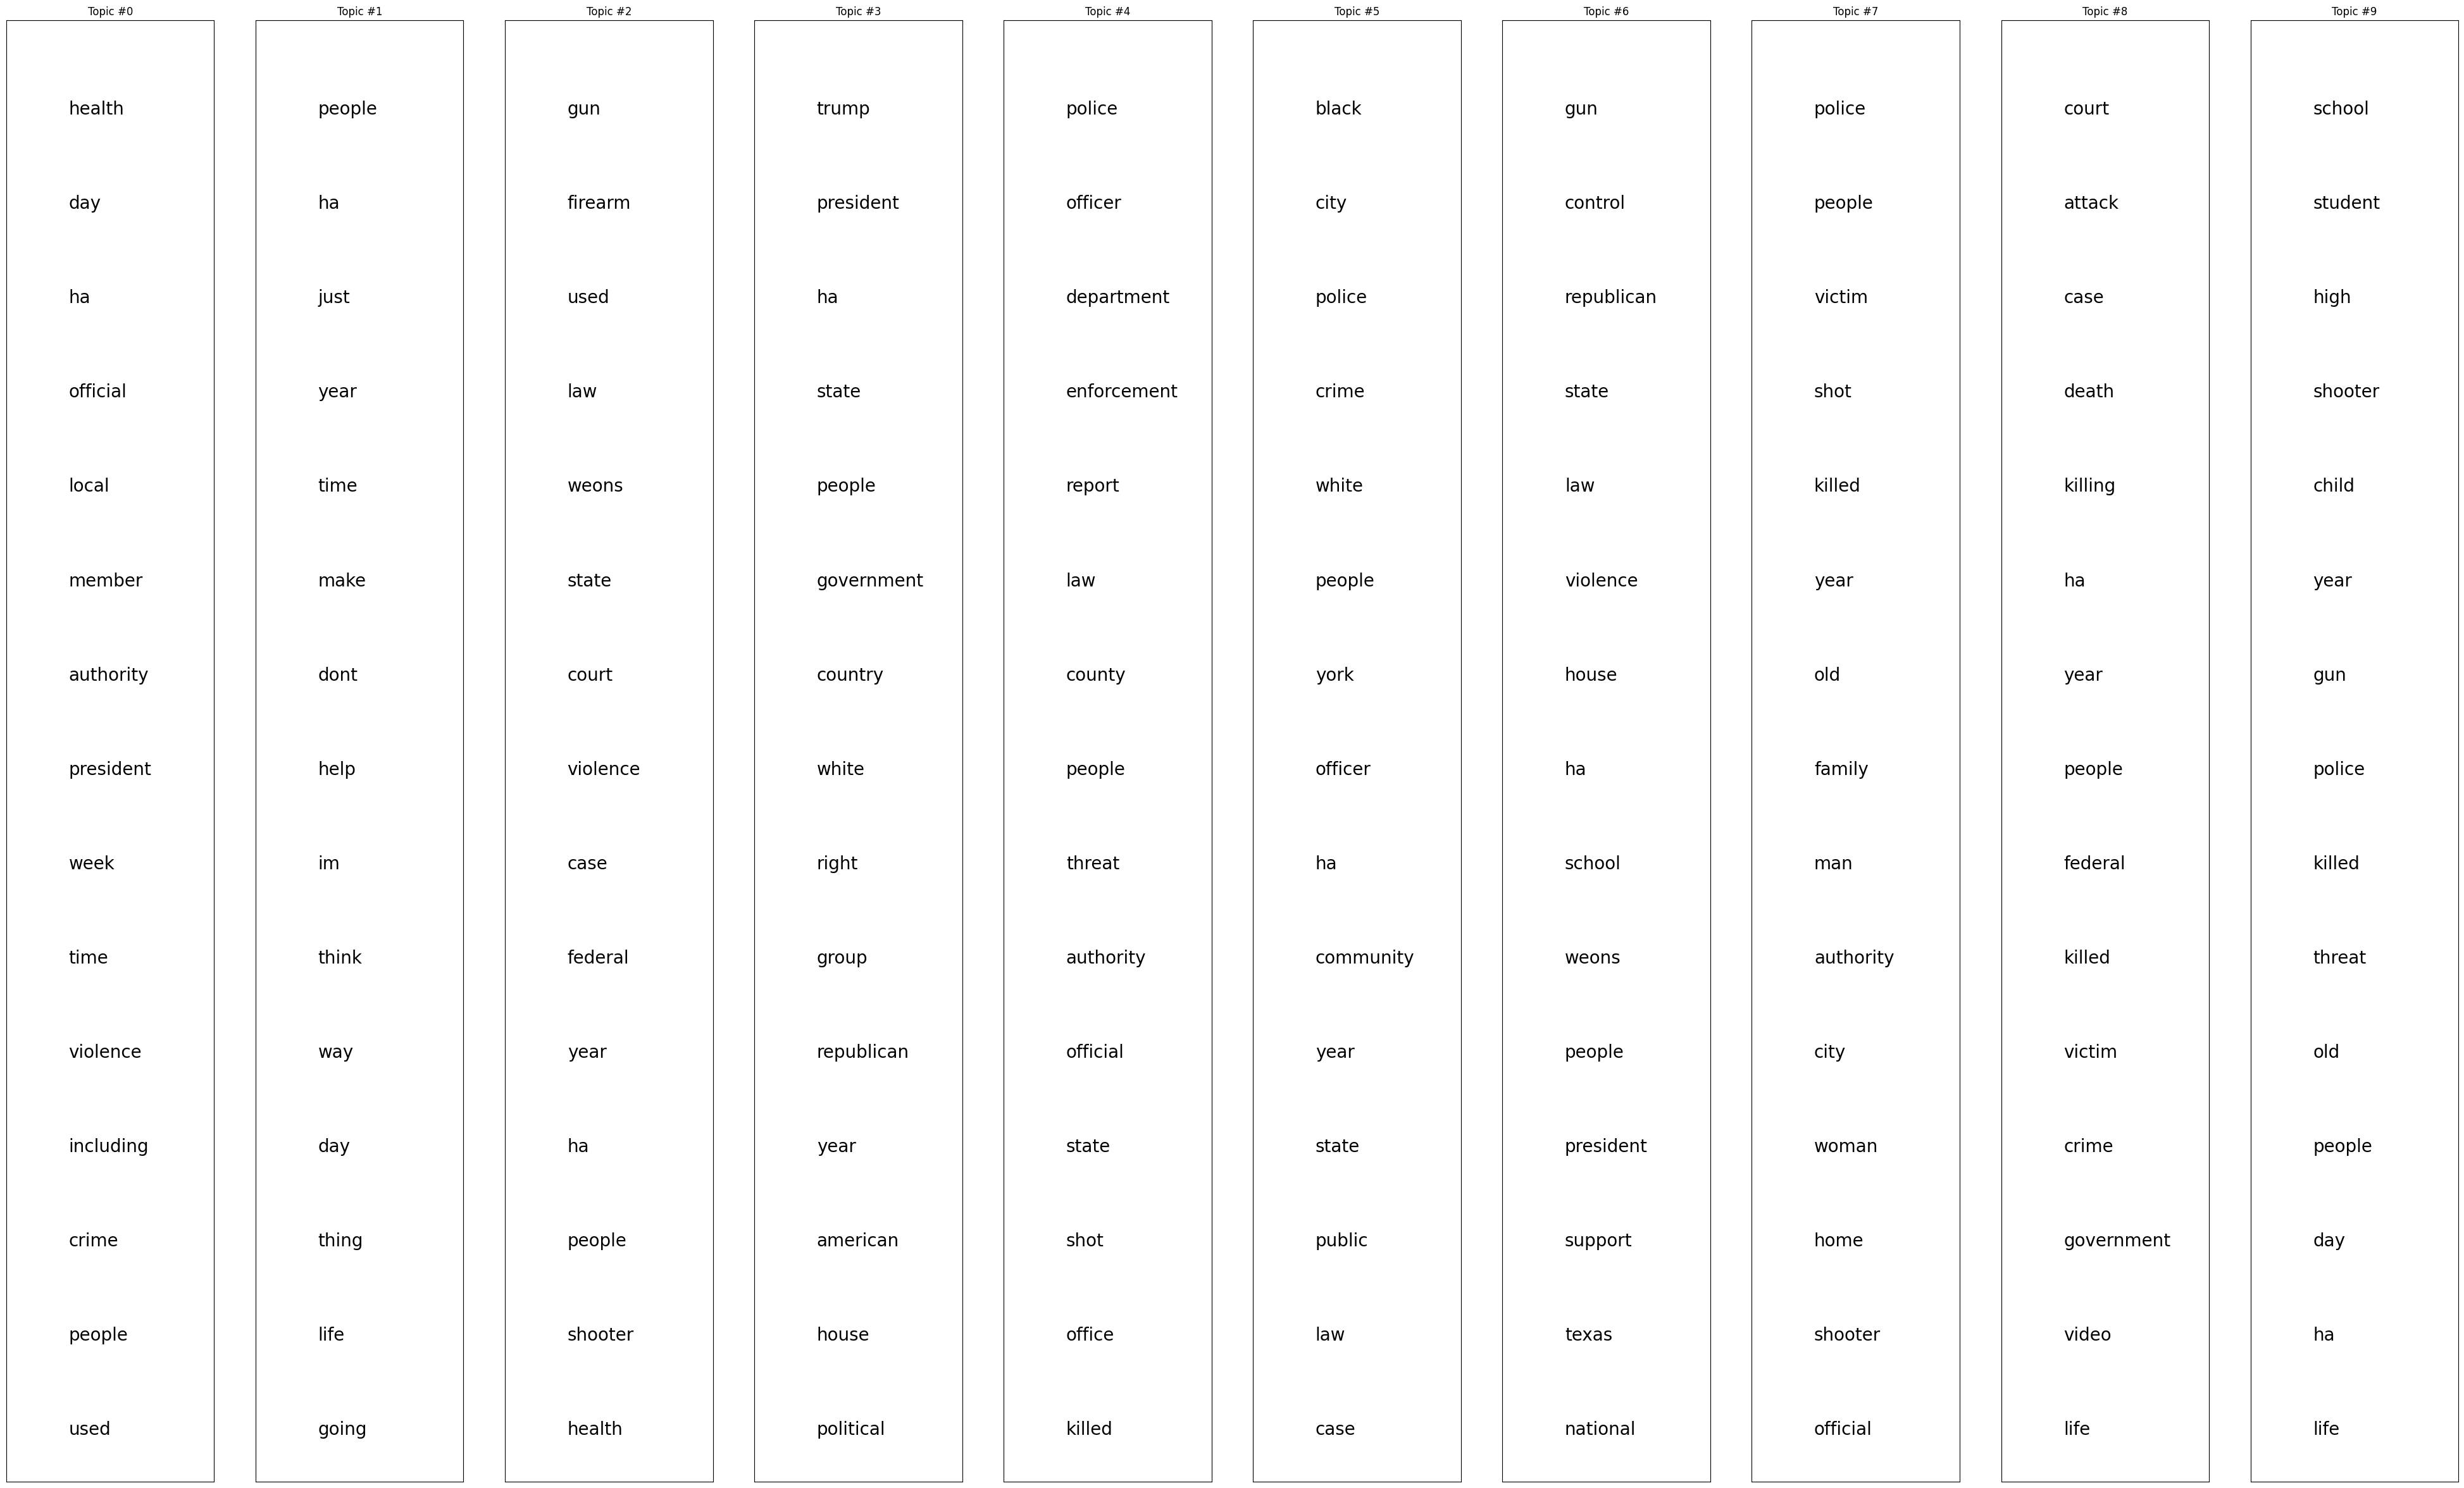

In [208]:
plt.figure(figsize=(50,30))
word_topic = np.array(lda_model_2.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(df_data.columns)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 40

NUM_TOPICS = 10

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base/2)
                 ##fontsize_base*share)


# plt.savefig("TopicsVis.pdf")
plt.show()

In [58]:
pickled_lda = pickle.dumps(lda_model)

In [61]:
with open("lda-5comp-lem-tfidf-100.pkl", "wb") as f:
    pickle.dump(lda_model, f)

In [64]:
lda_model.get_feature_names_out()

array(['latentdirichletallocation0', 'latentdirichletallocation1',
       'latentdirichletallocation2', 'latentdirichletallocation3',
       'latentdirichletallocation4'], dtype=object)

In [145]:
lda_df

(2625, 5)

In [349]:
articles = pd.read_csv("../text-mining-project-data/dirty/reduced-raw-article-data.csv")

In [350]:
def get_docs_out(lda_out, labels_, articles_, num_topics=10, num_top_doc=5):

    for topic in range(num_topics):
        print("###")
        print(f"Topic {topic + 1}:")
        top_docs = lda_out[:,topic].argsort()[-num_topics:]
        for i in range(num_top_doc):
            print(f"Doc {top_docs[num_top_docs-1-i]}:{labels_.iloc[top_docs[num_top_docs-1-i]]}: {articles_.iloc[top_docs[num_top_docs-1-i]]['url']}")
        print("###")

In [202]:
# Run LDA on dataset. Use 10 topics
lda_model_2 = decom.LatentDirichletAllocation(n_components=10, max_iter=100)

In [213]:
lda_df = lda_model_2.fit_transform(df_data)

In [352]:
right_df = pd.concat((df, articles), axis=1)
# right_df = right_df[right_df["labels"] == "left"]
right_labels = right_df["labels"]
right_df = right_df.drop("labels", axis=1)
right_articles = right_df[["url", "title", "content"]]
right_df = right_df.drop(["url", "title", "content"], axis=1)

,___,aaron,abandoned,abbott,abc,abiding,ability,able,abortion,abroad,...,younger,youngest,youre,youth,youtube,youve,zealand,zero,zone,zones
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2623,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2595.731689889954
2379.7647247652394
2282.4429892568346
2239.3523906524747
2226.199861635337
2197.251309348998
2178.6681319811087
2164.9458718235605
2134.476638691102
2127.6370031452275


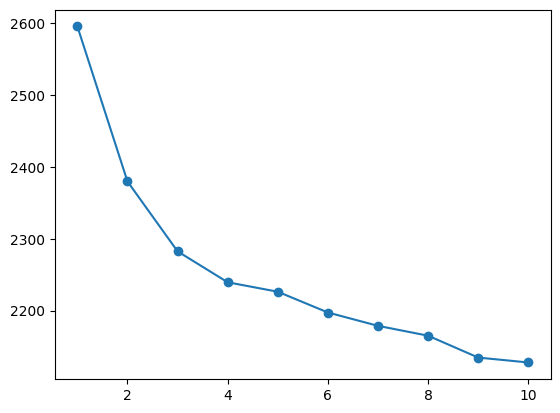

In [356]:
perplexities = np.zeros(10)
t = np.arange(1, 11)

for i in range(10):
    
    lda_model_3 = decom.LatentDirichletAllocation(n_components=i+1)
    lda_model_3.fit(right_df)
    perplexities[i] = lda_model_3.perplexity(right_df)
    print(perplexities[i])
    plt.plot(t, perplexities)
    plt.scatter(t, perplexities)
    plt.show()



In [360]:
lda_model_3 = decom.LatentDirichletAllocation(n_components=10)
lda_df_out = lda_model_3.fit_transform(right_df)

In [361]:
get_docs_out(lda_df_out, right_labels, right_articles, num_top_doc=10)

###
Topic 1:
Doc 1440:right: https://www.oann.com/video/oan-contribution/residents-of-lewiston-maine-gather-for-halloween-event-after-deadly-mass-shooting/
Doc 1447:right: https://www.oann.com/video/oan-contribution/calif-man-fights-for-his-life-after-being-critically-injured-in-mass-shooting/
Doc 1497:right: https://www.oann.com/video/oan-contribution/lott-nashville-shooting-a-continuation-of-a-pattern-targeting-gun-free-zones/
Doc 1453:right: https://www.oann.com/video/real-america-video/biden-uses-mass-shooting-to-push-gun-control/
Doc 1510:right: https://www.oann.com/video/oan-contribution/fla-state-rep-lets-put-background-checks-on-shot-clock/
Doc 1658:left: https://www.motherjones.com/politics/2022/05/golden-gate-village-affordable-housing-marin-city-bay-area-cooperative/
Doc 1794:left: https://www.motherjones.com/environment/2015/09/united-nations-sustainable-development-goals-climate/
Doc 1040:left: https://apnews.com/article/cancer-charity-panmass-challenge-ad11d593fd76b74e4ba

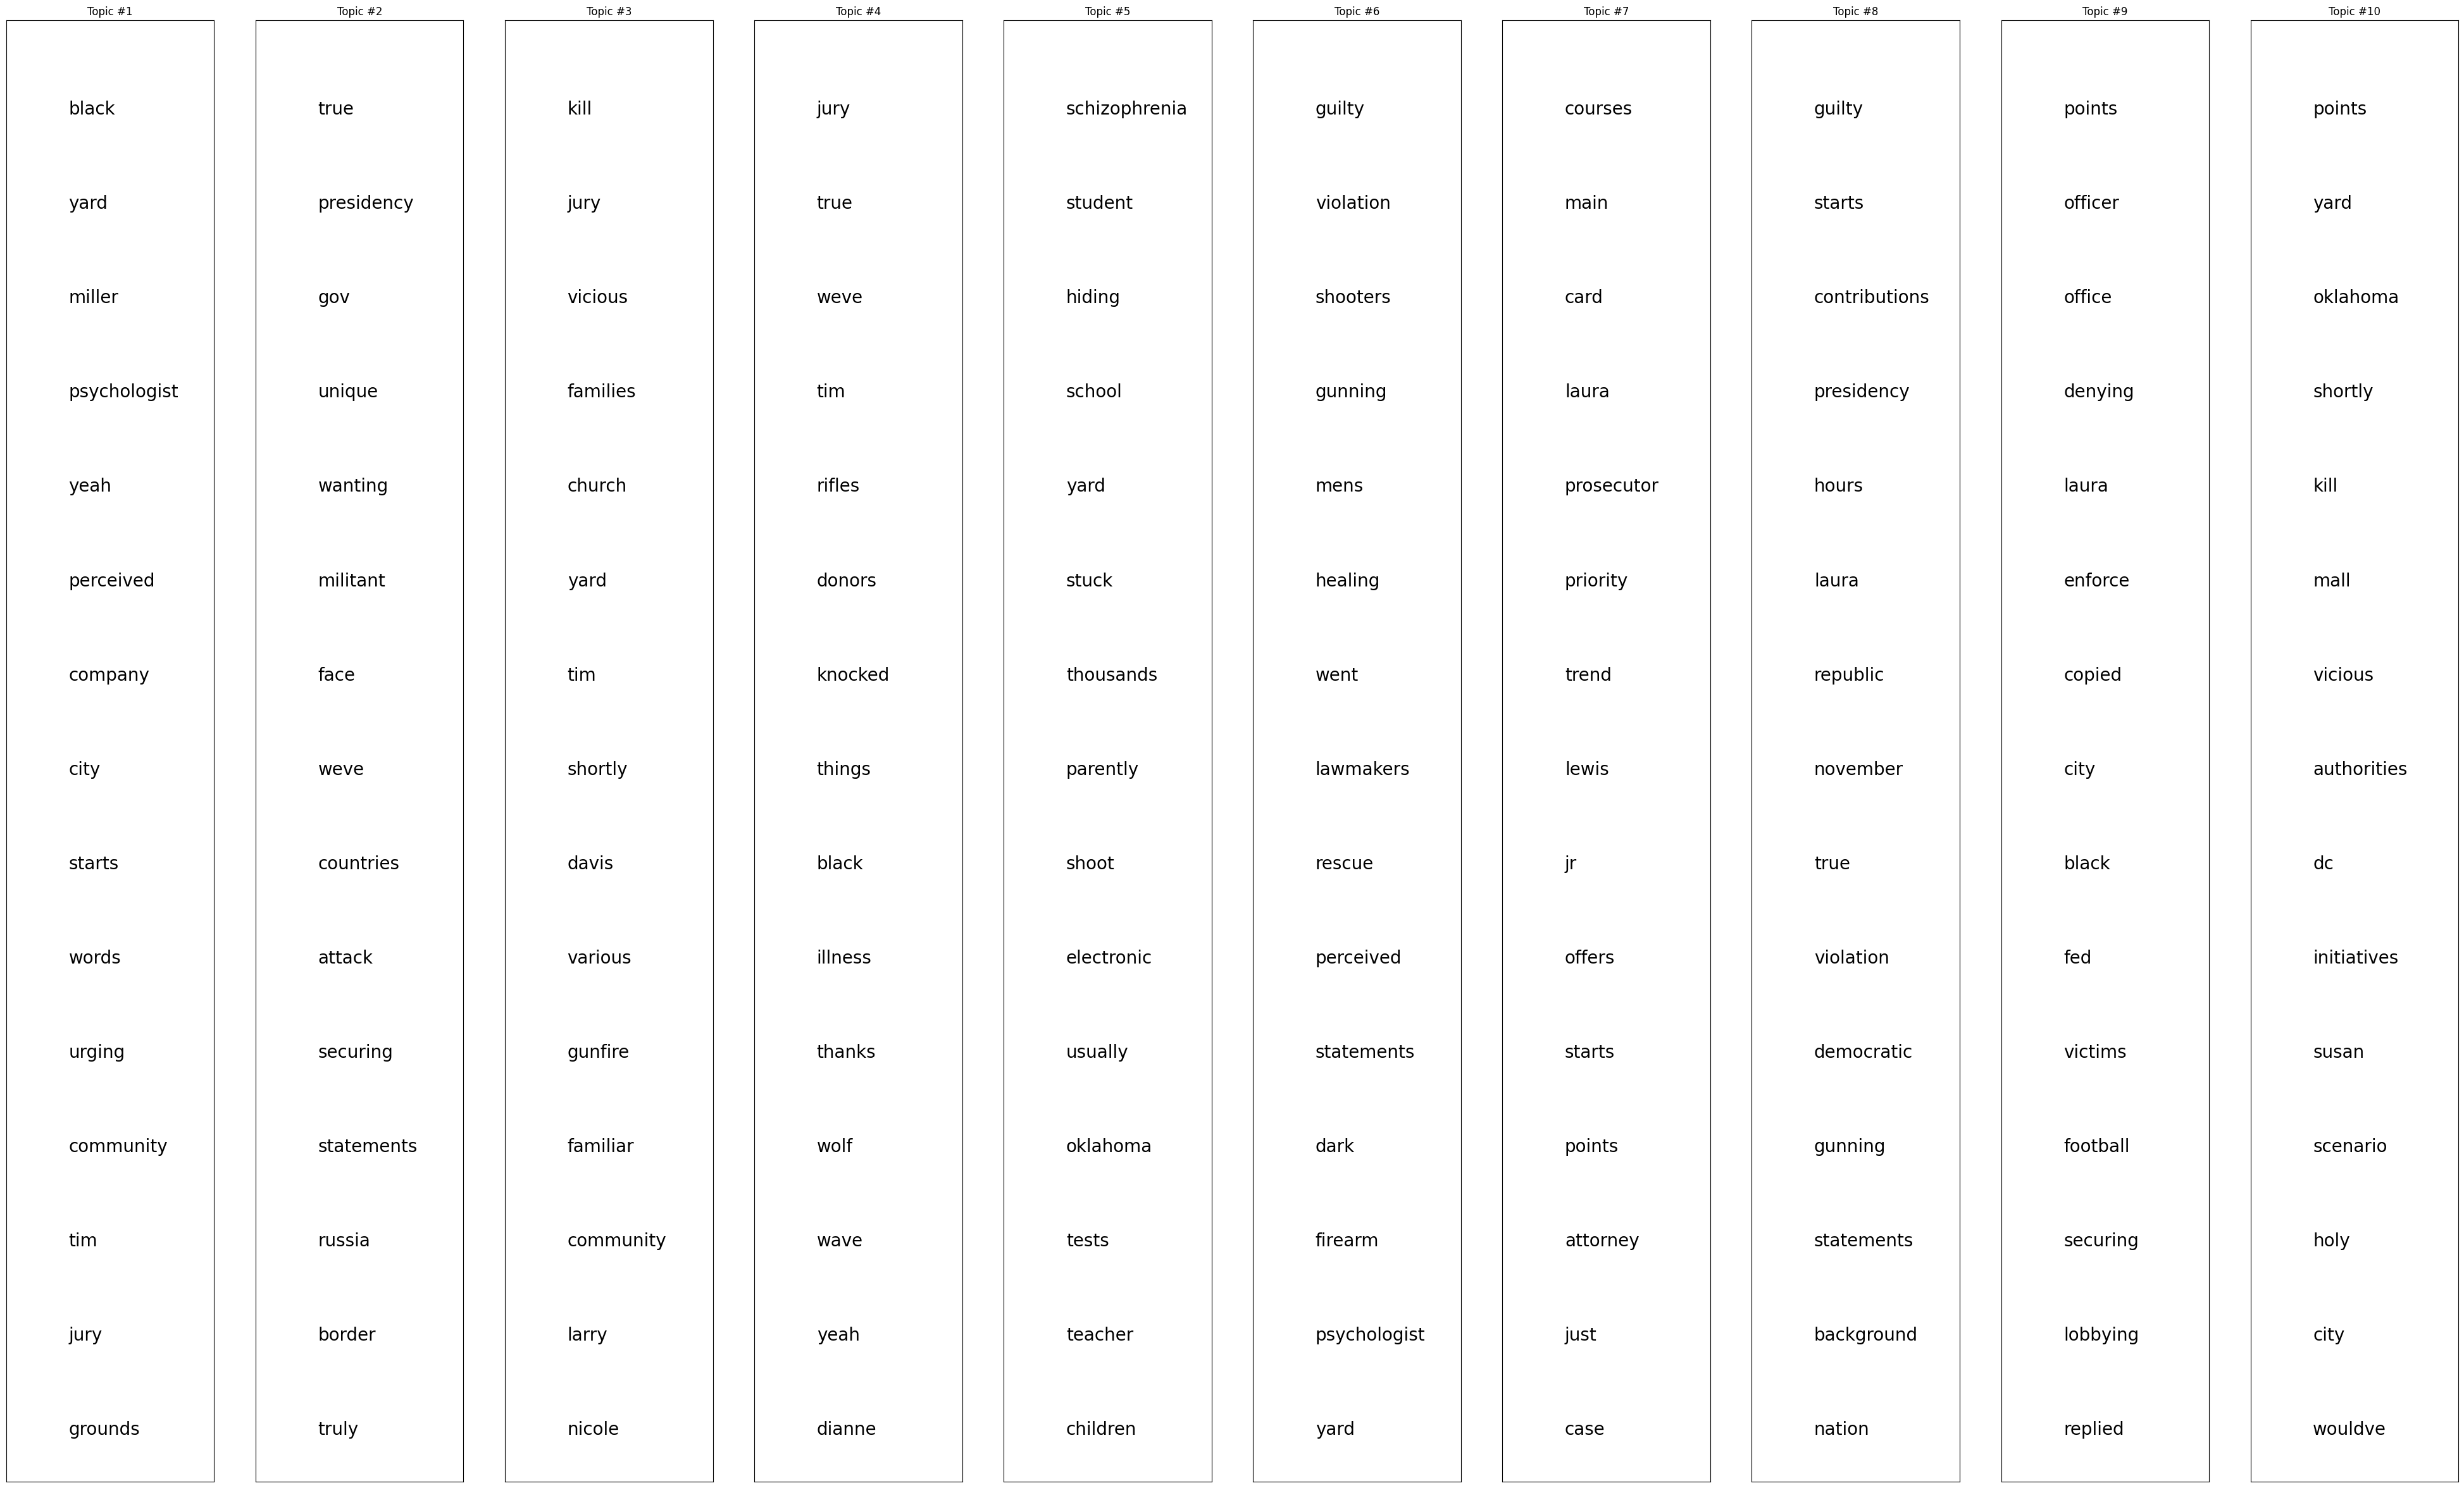

In [362]:
plt.figure(figsize=(50,30))
word_topic = np.array(lda_model_3.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(df_data.columns)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 40

NUM_TOPICS = 10

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t+1))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base/2)
                 ##fontsize_base*share)


plt.savefig("TopicsVis.pdf")
plt.show()

In [293]:
normed = lda_model_3.components_ / lda_model_3.components_.sum(axis=1)[:, np.newaxis]

array([0.01690726, 0.01242645, 0.00403382, 0.00686295, 0.00981366,
       0.00542265, 0.00304061, 0.00886591, 0.00773263, 0.00722814,
       0.00570829, 0.01884697, 0.00508965, 0.00450074, 0.00416309,
       0.01167375, 0.00575288, 0.00628102, 0.00867419, 0.00489931,
       0.00654098, 0.00544745, 0.00590905, 0.00949172, 0.01059496,
       0.00101114, 0.00770097, 0.02044144, 0.01932301, 0.00965867,
       0.03311061, 0.00406027, 0.00407368, 0.00451098, 0.00549135,
       0.01862698, 0.00424013, 0.01010448, 0.01122511, 0.00660871,
       0.00327993, 0.00773383, 0.00653001, 0.0095639 , 0.00724289,
       0.0104743 , 0.00675372, 0.0067483 , 0.00786542, 0.00898982,
       0.00462496, 0.01076529, 0.01247501, 0.01226375, 0.01494334,
       0.00810411, 0.01233632, 0.00566868, 0.00747366, 0.00228946,
       0.00967538, 0.00399809, 0.02086563, 0.00693251, 0.00540954,
       0.0177714 , 0.04015282, 0.00810582, 0.00774859, 0.02273626,
       0.01987573, 0.00660754, 0.00427954, 0.0046527 , 0.00221

In [321]:
np.round(lda_df_out[0], 2)

array([0.02, 0.02, 0.14, 0.02, 0.02, 0.02, 0.71, 0.02, 0.02, 0.02])